In [7]:
%matplotlib inline
import numpy as np
import lsst.sims.utils as utils
import healpy as hp
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units as u
from astropy.time import Time
import matplotlib.pylab as plt

In [2]:
# Create a simple ra,dec map and make versions in galactic and ecliptic coords too
nside = 256
ra, dec = utils._hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))
coord = SkyCoord(ra=ra*u.rad,dec=dec*u.rad)
g_long, g_lat = coord.galactic.l.radian, coord.galactic.b.radian #utils._galacticFromEquatorial(ra,dec)
eclip_long, eclip_lat = coord.barycentrictrueecliptic.lon.radian, coord.barycentrictrueecliptic.lat.radian

In [3]:
print 'resolution = %f degrees, npixels = %i' % (hp.nside2resol(nside,arcmin=True)/60., hp.nside2npix(nside))

resolution = 0.229032 degrees, npixels = 786432


In [4]:
# Set borders of different regions and weights
galactic_lat_max = 10.
main_dec = 0
main_weight = 1.

south_dec = -60
south_weight = 0.4

nes_dec = 0.
nes_eclip = 15.
nes_weight = 0.5

gal_lat = 10.
gal_long_end1 = 70.
gal_long_end2 = 270.
gal_weight = 0.2

In [15]:
# Make the target region map
regionMap = np.zeros(hp.nside2npix(nside))+hp.UNSEEN
# Set everything below dec <= 0 to be one
regionMap[np.where(dec <= np.radians(main_dec))] = main_weight
# Set the South Region 
regionMap[np.where(dec < np.radians(south_dec))] = south_weight
# Set the NES
regionMap[np.where((dec > np.radians(nes_dec)) & (eclip_lat < np.radians(nes_eclip)))] = nes_weight
# Set the Galactic Plane
regionMap[np.where( (np.abs(g_lat) < np.radians(gal_lat)) & (g_long < np.radians(gal_long_end1)) )] = gal_weight
regionMap[np.where( (np.abs(g_lat) < np.radians(gal_lat)) & (g_long > np.radians(gal_long_end2)) )] = gal_weight

# find the healpixel closest to M67
distances = np.degrees(utils.haversine(ra, dec, np.radians(9./24.*360.), np.radians(12.)))
good = np.where(distances < 3.5)
regionMap[good] = 0.9

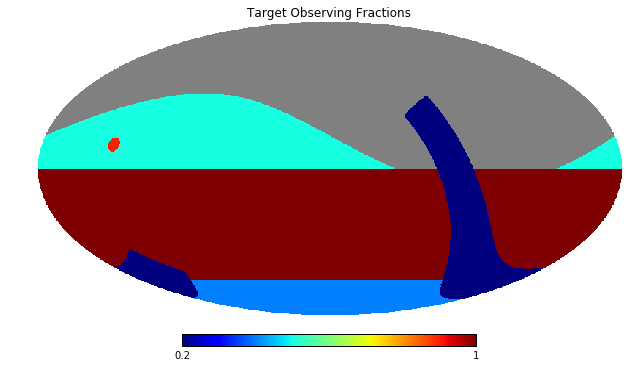

In [16]:
# Normalize and display
regionMap = regionMap/np.median(regionMap[np.where(regionMap != hp.UNSEEN)])
hp.mollview(regionMap, title='Target Observing Fractions')